In [1]:
from physicsnemo.datapipes.gnn.hydrographnet_dataset import HydroGraphDataset

dataset = HydroGraphDataset(
    name="hydrograph_dataset",
    data_dir="./outputs_phy/data",
    prefix="M80",
    num_samples=500,
    n_time_steps=2,
    k=4,
    noise_type="none",
    noise_std=0.01,
    hydrograph_ids_file='train_50.txt',
    # hydrograph_ids_file='train_100.txt',
    split="train",
    # hydrograph_ids_file='test_10.txt',
    # split="test",
    # rollout_length=30,
    force_reload=False,
    verbose=False,
    return_physics=True,
)

c:\Users\Carlo\Documents\School\Masters\NUS\Dissertation\HydroGraphNet\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[INFO] Data directory outputs_phy\data already exists. Skipping download.
Processing Hydrographs: 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


[]

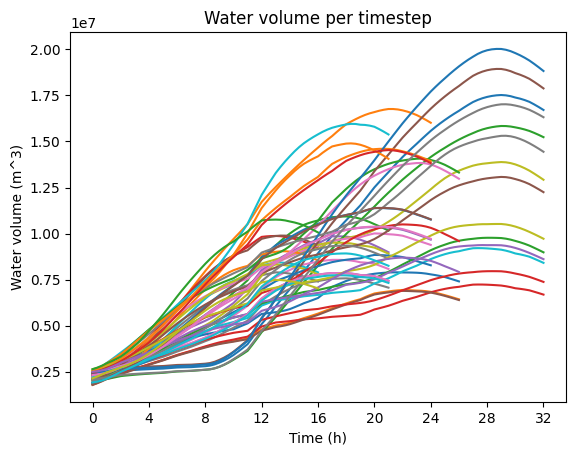

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# water_depth_mean = dataset.dynamic_stats['water_depth']['mean']
# water_depth_std = dataset.dynamic_stats['water_depth']['std']
last_ts = dataset.rollout_length if dataset.split == "test" else None

water_depth_mean = dataset.dynamic_stats['volume']['mean']
water_depth_std = dataset.dynamic_stats['volume']['std']

delta_t = 1200
delta_t_in_hours = delta_t / 3600
longest_hours_elapsed = []
for dyn in dataset.dynamic_data:
    # water_depth = dyn['water_depth'][:last_ts]
    water_depth = dyn['volume'][:last_ts]
    water_depth = dataset.denormalize(water_depth, water_depth_mean, water_depth_std)
    assert (water_depth >= 0).all(), "Water depth should be positive"
    total_wd_per_ts = water_depth.sum(axis=1)
    hours_elapsed = np.arange(len(total_wd_per_ts)) * delta_t_in_hours
    plt.plot(hours_elapsed, total_wd_per_ts)
    if len(hours_elapsed) > len(longest_hours_elapsed):
        longest_hours_elapsed = hours_elapsed

tick_interval_in_hours = 4
# plt.title(f'Water depth per timestep')
plt.title(f'Water volume per timestep')
plt.xlabel('Time (h)')
interval_ticks = np.arange(0, len(longest_hours_elapsed), int(tick_interval_in_hours / delta_t_in_hours))
plt.xticks(longest_hours_elapsed[interval_ticks])
# plt.ylabel('Water depth')
plt.ylabel('Water volume (m^3)')
plt.plot()

In [3]:
import numpy as np

print(f"Total samples in dataset: {len(dataset)}")

total_nodes = dataset.dynamic_data[0]['water_depth'].shape[1]
print(f"Total nodes for train: {total_nodes}")

dataset_num_timesteps = []
dataset_flooded_percentage = []
for dyn in dataset.dynamic_data:
    water_depth = dyn['water_depth']
    is_flooded = water_depth > 0
    flooded_nodes = is_flooded.sum(axis=1)
    average_flooded_nodes = flooded_nodes.mean()
    flooded_percentage = (average_flooded_nodes / total_nodes) * 100
    dataset_flooded_percentage.append(flooded_percentage)
    dataset_num_timesteps.append(water_depth.shape[0])

print(f"Average Flooded percentage for train: {np.array(dataset_flooded_percentage).mean():.2f}%")
print(f"Flood percentages for train: {dataset_flooded_percentage}")
print(f"Average number of timesteps for train: {np.array(dataset_num_timesteps).mean():.0f}")


Total samples in dataset: 3628
Total nodes for train: 4787
Average Flooded percentage for train: 23.92%
Flood percentages for train: [28.974305410486735, 31.631044123496572, 23.435215166074784, 22.891504627754593, 23.162014309588468, 22.09981966465299, 20.522704721119702, 19.764412972207893, 28.802448211328358, 19.978001645613332, 21.294751343961625, 18.760461481914362, 26.827382580399235, 19.979799241502437, 23.68171789464045, 18.434155796421216, 23.796183155864483, 19.19717463964905, 21.7503133486526, 30.28971694171715, 25.111102844175576, 20.92188452569246, 28.629754107247212, 20.939227590187343, 19.59604136202214, 30.476871423679686, 27.202629484389423, 30.399341860149587, 21.010560062754998, 22.86389900482191, 21.729512864464546, 29.765832691850928, 23.01594309330037, 23.726178230598162, 23.185646693471796, 27.333693702230484, 19.874138291205348, 20.827566847712557, 24.756266434652268, 19.397913620221434, 30.95841615716104, 29.087241487361602, 24.231016827035806, 28.96772365796635

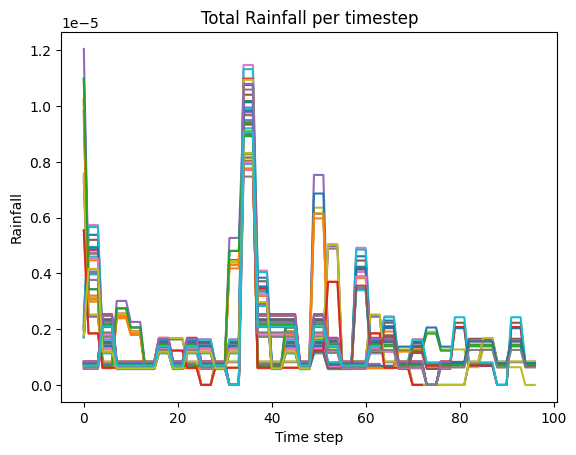

In [4]:
rainfall_mean = dataset.dynamic_stats['precipitation']['mean']
rainfall_std = dataset.dynamic_stats['precipitation']['std']
last_ts = dataset.rollout_length if dataset.split == "test" else None

for dyn in dataset.dynamic_data:
    # plt.figure(figsize=(10, 5))
    rainfall = dyn['precipitation'][:last_ts]
    rainfall = dataset.denormalize(rainfall, rainfall_mean, rainfall_std)
    plt.plot(rainfall)
    plt.title(f'Total Rainfall per timestep')
    plt.xlabel('Time step')
    plt.ylabel('Rainfall')

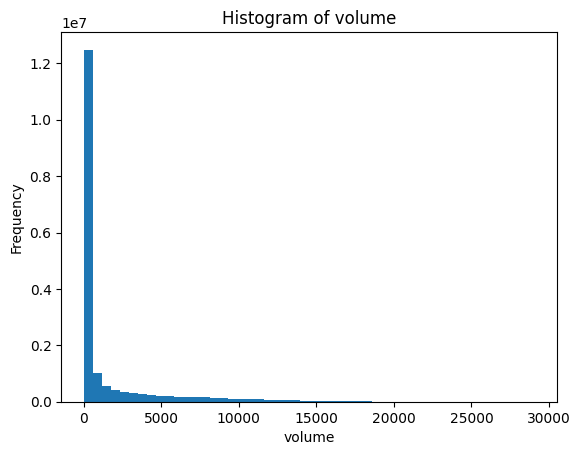

In [5]:
feature = 'volume'
bins = 50
vol_mean = dataset.dynamic_stats[feature]['mean']
vol_std = dataset.dynamic_stats[feature]['std']

all_feature_data = []
for dyn in dataset.dynamic_data:
    volume = dyn[feature][:last_ts]
    volume = dataset.denormalize(volume, vol_mean, vol_std)
    all_feature_data.append(volume.flatten())
all_feature_data = np.concatenate(all_feature_data)
plt.hist(all_feature_data, bins=bins)
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()